In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import mlp

shape (768, 9)


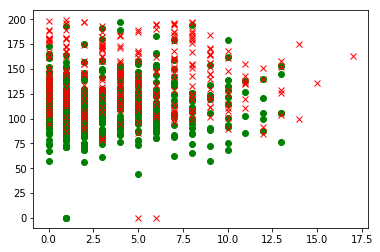

In [2]:

pima= pd.read_csv('dataset/pima-id.csv',header=None)
pima=np.array(pima)
print "shape",pima.shape
# Plot the first and second values for the two classes
indices0 = np.where(pima[:,8]==0)
indices1 = np.where(pima[:,8]==1)

pl.ion()
pl.plot(pima[indices0,0],pima[indices0,1],'go')
pl.plot(pima[indices1,0],pima[indices1,1],'rx')
pl.show()

In [3]:
# pre-processing steps
pima[np.where(pima[:,0]>8),0] = 8

pima[np.where(pima[:,7]<=30),7] = 1
pima[np.where((pima[:,7]>30) & (pima[:,7]<=40)),7] = 2
pima[np.where((pima[:,7]>40) & (pima[:,7]<=50)),7] = 3
pima[np.where((pima[:,7]>50) & (pima[:,7]<=60)),7] = 4
pima[np.where(pima[:,7]>60),7] = 5

In [4]:
# normalizing inputs
pima[:,:8] = pima[:,:8]-pima[:,:8].mean(axis=0)
pima[:,:8] = pima[:,:8]/pima[:,:8].var(axis=0)

In [5]:
order = range(np.shape(pima)[0])
# shuffling the dataset
np.random.shuffle(order)
pima = pima[order,:]
print pima.shape

(768, 9)


In [6]:
# target feature
target = pima[:,8:]
# train features
train = pima[:,0:8]
# training data
x_train = train[::2,:]
y_train = target[::2]
print x_train.shape, y_train.shape
# validation data
x_valid = train[1::4,:]
y_valid = target[1::4]
print x_valid.shape,y_valid.shape 
# test data
x_test = train[3::4,:]
y_test = target[3::4]
print x_test.shape, y_test.shape 

(384, 8) (384, 1)
(192, 8) (192, 1)
(192, 8) (192, 1)


In [7]:
# initialzation
net = mlp.mlp(x_train,y_train,10,outtype='logistic')
print "Initialized"

Initialized


In [8]:
e=0
aa= []
bb = []
cc =[]
for i in [0.001,0.003,0.01,0.03,0.1,0.3]:
	for it in [1000,2500,5000]:
		net.earlystopping(x_train,y_train,x_valid,y_valid,i)
		e = net.mlptrain(x_train,y_train,i,it)
		ll = net.confmat(x_train,y_train)
		aa.append(i)
		bb.append(it)
		cc.append(e)


In validation 1
This is training
Iteration:  0  Error:  46.60864543242937
In validation 2
This is training
Iteration:  0  Error:  39.40314974021985
In validation 3
This is training
Iteration:  0  Error:  38.16734757851498
In validation 4
This is training
Iteration:  0  Error:  37.50692753249227
In validation 5
This is training
Iteration:  0  Error:  36.84664081668316
In validation 6
This is training
Iteration:  0  Error:  36.06882639417729
In validation 7
This is training
Iteration:  0  Error:  35.19345617391247
In validation 8
This is training
Iteration:  0  Error:  34.29970619948723
In validation 9
This is training
Iteration:  0  Error:  33.465560355401536
In validation 10
This is training
Iteration:  0  Error:  32.74082144942241
In validation 11
This is training
Iteration:  0  Error:  32.13195257829089
In validation 12
This is training
Iteration:  0  Error:  31.61955778421375
In validation 13
This is training
Iteration:  0  Error:  31.177570604894335
In validation 14
This is trainin

Iteration:  100  Error:  20.945634995530096
Iteration:  200  Error:  20.830946017177883
Iteration:  300  Error:  20.718246822525558
Iteration:  400  Error:  20.608220239545076
Iteration:  500  Error:  20.50110216093305
Iteration:  600  Error:  20.39669529726816
Iteration:  700  Error:  20.29462563520879
Iteration:  800  Error:  20.19450267945691
Iteration:  900  Error:  20.09597282137324
Confusion matrix is:
[[230.  31.]
 [ 20. 103.]]
In validation 1
This is training
Iteration:  0  Error:  19.9987345895221
In validation 2
This is training
Iteration:  0  Error:  19.911168347146948
In validation 3
This is training
Iteration:  0  Error:  19.824331867298348
Stopped 20.133769711880653 20.080778767083586 20.024528563419356
This is training
Iteration:  0  Error:  19.7381424303461
Iteration:  100  Error:  19.652570611678627
Iteration:  200  Error:  19.559273286419174
Iteration:  300  Error:  19.466838223120305
Iteration:  400  Error:  19.37538744293747
Iteration:  500  Error:  19.2850482543122

Iteration:  1200  Error:  10.85156370863753
Iteration:  1300  Error:  10.937474720868408
Iteration:  1400  Error:  10.800518878252387
Iteration:  1500  Error:  10.768479625570247
Iteration:  1600  Error:  11.658541870687564
Iteration:  1700  Error:  10.715880937964865
Iteration:  1800  Error:  10.673360253196993
Iteration:  1900  Error:  13.123759325604302
Iteration:  2000  Error:  10.65181054610925
Iteration:  2100  Error:  10.600219889224089
Iteration:  2200  Error:  10.563443356917396
Iteration:  2300  Error:  17.83309361818671
Iteration:  2400  Error:  10.67394342917218
Iteration:  2500  Error:  10.53975419687028
Iteration:  2600  Error:  10.491136477660248
Iteration:  2700  Error:  10.454407956900244
Iteration:  2800  Error:  10.422892752173755
Iteration:  2900  Error:  10.394758520636044
Iteration:  3000  Error:  12.491540916943624
Iteration:  3100  Error:  10.402176483900432
Iteration:  3200  Error:  10.34285999353213
Iteration:  3300  Error:  10.310868398440693
Iteration:  3400

In validation 5
This is training
Iteration:  0  Error:  22.01258116852798
In validation 6
This is training
Iteration:  0  Error:  27.48032129197469
In validation 7
This is training
Iteration:  0  Error:  19.665119586674326
In validation 8
This is training
Iteration:  0  Error:  18.022097107595023
In validation 9
This is training
Iteration:  0  Error:  16.30411120601095
In validation 10
This is training
Iteration:  0  Error:  24.356569513864862
In validation 11
This is training
Iteration:  0  Error:  17.478907690954554
Stopped 31.598849758474614 30.826190775521802 29.48808606501675
This is training
Iteration:  0  Error:  19.89413107474492
Iteration:  100  Error:  17.421210469084365
Iteration:  200  Error:  16.2043084535028
Iteration:  300  Error:  17.3022936581052
Iteration:  400  Error:  19.93835785526425
Iteration:  500  Error:  18.784650472818996
Iteration:  600  Error:  31.516690651835475
Iteration:  700  Error:  16.113155349419493
Iteration:  800  Error:  18.3541922470289
Iteration

mlp.py:96: RuntimeWarning: overflow encountered in exp
  self.hidden = 1.0/(1.0+np.exp(-self.beta*self.hidden))


Iteration:  1300  Error:  50.960650683091416
Iteration:  1400  Error:  50.43268598077408
Iteration:  1500  Error:  49.66639110974004
Iteration:  1600  Error:  49.64867153857003
Iteration:  1700  Error:  49.63489985283461
Iteration:  1800  Error:  49.62311617009933
Iteration:  1900  Error:  49.61101654379199
Iteration:  2000  Error:  49.59502954546814
Iteration:  2100  Error:  49.56981526990906
Iteration:  2200  Error:  49.51507278605628
Iteration:  2300  Error:  49.42464316638471
Iteration:  2400  Error:  48.9025340950688
Confusion matrix is:
[[201.  51.]
 [ 49.  83.]]
In validation 1
This is training
Iteration:  0  Error:  48.87174396901026
In validation 2
This is training
Iteration:  0  Error:  48.683775490712534
In validation 3
This is training
Iteration:  0  Error:  48.63716225661991
Stopped 32.52802630624528 32.50600387218901 32.4783058977813
This is training
Iteration:  0  Error:  48.60506722045014
Iteration:  100  Error:  48.582045919910534
Iteration:  200  Error:  48.5630839336

In [9]:
ind = cc.index(min(cc))
print ind,aa[ind],bb[ind],cc[ind]

8 0.01 5000 10.028319199332557


In [10]:
e = net.mlptrain(x_train,y_train,aa[ind],bb[ind])
ll = net.confmat(x_test,y_test)
print ll

This is training
Iteration:  0  Error:  50.44188942833132
Iteration:  100  Error:  50.44172401654993
Iteration:  200  Error:  50.44154353747429
Iteration:  300  Error:  50.44136441529143
Iteration:  400  Error:  50.441186644687676
Iteration:  500  Error:  50.441010219667305
Iteration:  600  Error:  50.440835133999286
Iteration:  700  Error:  50.44066138122752
Iteration:  800  Error:  50.44048895468096
Iteration:  900  Error:  50.44031784748339
Iteration:  1000  Error:  50.440148052563316
Iteration:  1100  Error:  50.43997956266334
Iteration:  1200  Error:  50.43981237034957
Iteration:  1300  Error:  50.43964646802072
Iteration:  1400  Error:  50.439481847916966
Iteration:  1500  Error:  50.439318502128714
Iteration:  1600  Error:  50.43915642260497
Iteration:  1700  Error:  50.43899560116167
Iteration:  1800  Error:  50.43883602948968
Iteration:  1900  Error:  50.43867769916257
Iteration:  2000  Error:  50.438520601644264
Iteration:  2100  Error:  50.438364728296364
Iteration:  2200  E